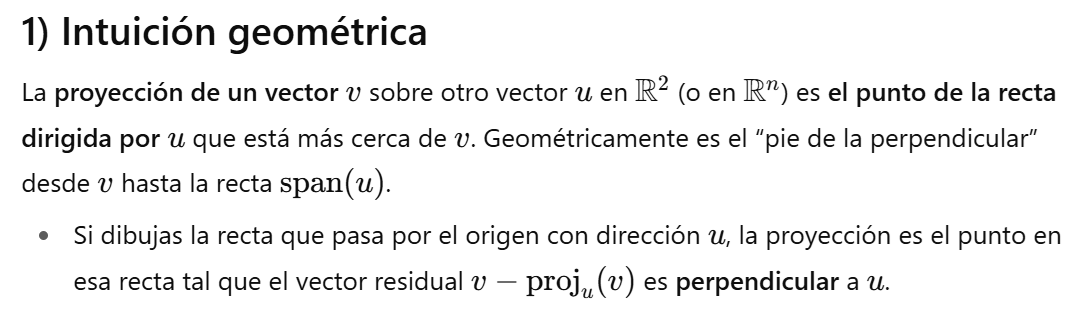

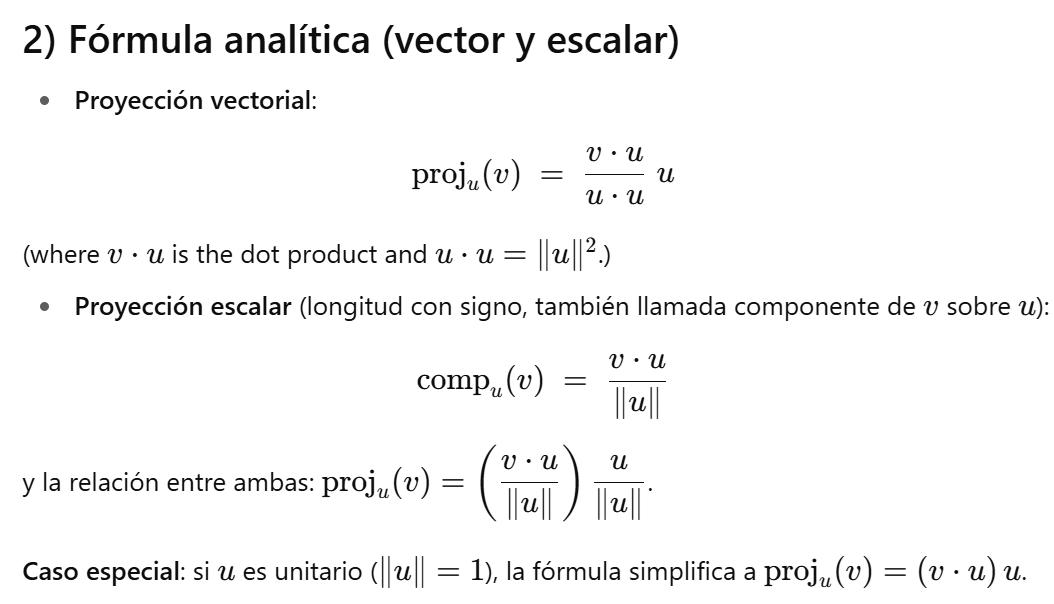

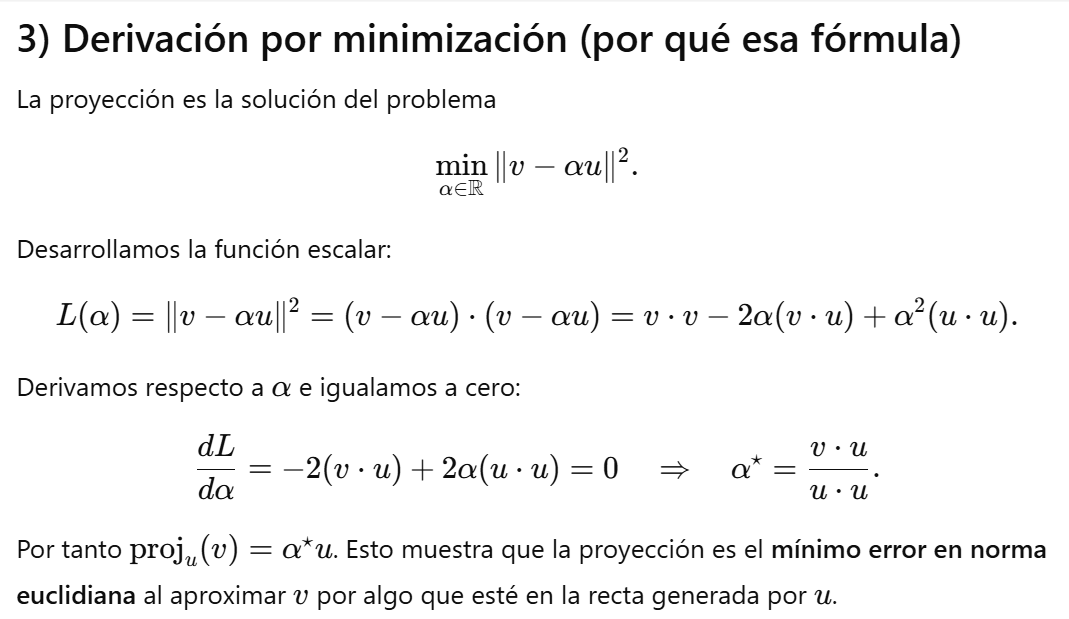

Coeficiente óptimo (analítico): 2.2
Proyección analítica: [2.2 4.4]
Coeficiente final (descenso gradiente): 2.199997901916504
Proyección por GD: [2.1999979 4.3999958]


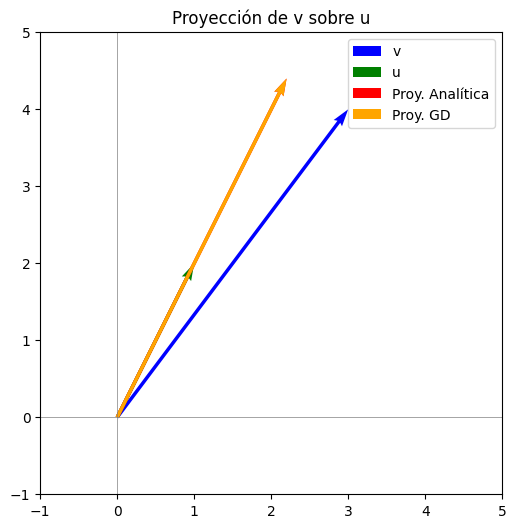

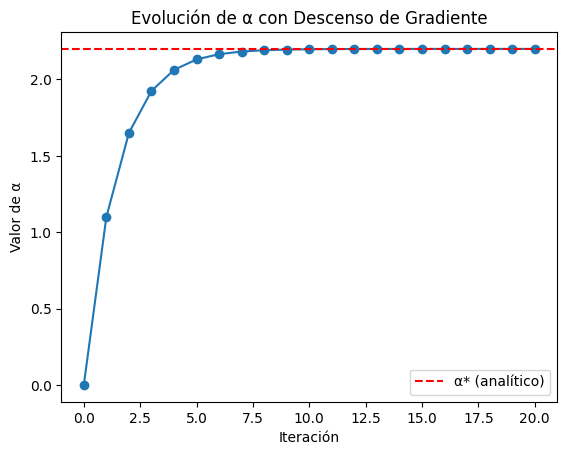

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================
# 1. Datos iniciales
# ==============================
v = np.array([3.0, 4.0])   # vector a proyectar
u = np.array([1.0, 2.0])   # vector base

# ==============================
# 2. Proyección analítica
# ==============================
alpha_star = np.dot(v, u) / np.dot(u, u)  # coeficiente óptimo
proj_analitica = alpha_star * u

print("Coeficiente óptimo (analítico):", alpha_star)
print("Proyección analítica:", proj_analitica)

# ==============================
# 3. Descenso de gradiente
# ==============================
eta = 0.05        # tasa de aprendizaje (menor que 1/(u·u) = 1/5 = 0.2)
alpha = 0.0       # valor inicial
iteraciones = 20  # número de pasos

trayectoria = [alpha]  # guardar valores de alpha

for t in range(iteraciones):
    grad = 2 * alpha * np.dot(u, u) - 2 * np.dot(v, u)   # gradiente
    alpha = alpha - eta * grad                           # actualización
    trayectoria.append(alpha)

proj_gd = alpha * u

print("Coeficiente final (descenso gradiente):", alpha)
print("Proyección por GD:", proj_gd)

# ==============================
# 4. Visualización
# ==============================
plt.figure(figsize=(6,6))
plt.axhline(0, color="gray", linewidth=0.5)
plt.axvline(0, color="gray", linewidth=0.5)

# Dibujo de vectores
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color="blue", label="v")
plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color="green", label="u")
plt.quiver(0, 0, proj_analitica[0], proj_analitica[1], angles='xy', scale_units='xy', scale=1, color="red", label="Proy. Analítica")
plt.quiver(0, 0, proj_gd[0], proj_gd[1], angles='xy', scale_units='xy', scale=1, color="orange", label="Proy. GD")

# Formato
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.gca().set_aspect("equal", adjustable="box")
plt.legend()
plt.title("Proyección de v sobre u")

plt.show()

# ==============================
# 5. Evolución de alpha
# ==============================
plt.plot(trayectoria, marker="o")
plt.axhline(alpha_star, color="red", linestyle="--", label="α* (analítico)")
plt.xlabel("Iteración")
plt.ylabel("Valor de α")
plt.title("Evolución de α con Descenso de Gradiente")
plt.legend()
plt.show()


In [2]:
!pip install deepface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/128.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.3 MB/s eta 0:00:00


25-09-08 05:19:39 - Directory /root/.deepface has been created
25-09-08 05:19:39 - Directory /root/.deepface/weights has been created


Saving foto1.jpg to foto1.jpg
Saving foto2.jpg to foto2.jpg
25-09-08 05:19:51 - 🔗 facenet_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5 to /root/.deepface/weights/facenet_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:00<00:00, 271MB/s]


Dimensión del embedding: (128,)
Coeficiente óptimo (analítico): 0.6182504904657609
Coeficiente final (GD): 0.6182504904657606
Cosine similarity (v, u): 0.6396316837330259
Cosine similarity (proj(v), u): 0.9999999999999999


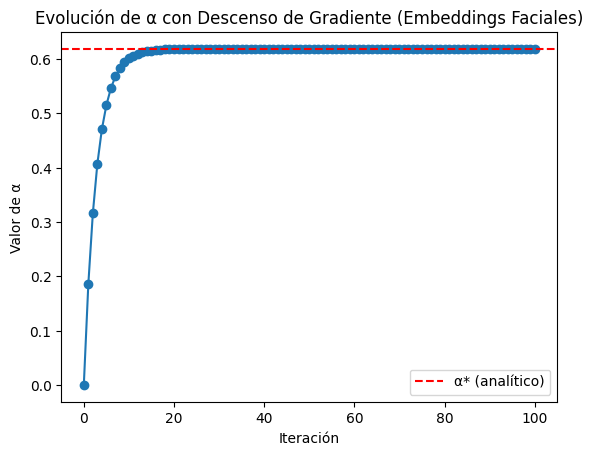

In [3]:
import numpy as np
from deepface import DeepFace
import matplotlib.pyplot as plt
from google.colab import files

# Seleccionar las 3 fotos
uploaded = files.upload()


# ==============================
# 1. Extraer embeddings de dos fotos
# ==============================
# Reemplaza por tus imágenes
img1 = "foto1.jpg"
img2 = "foto2.jpg"

# Obtenemos embeddings (128D o 512D según el modelo)
v = np.array(DeepFace.represent(img_path=img1, model_name="Facenet")[0]["embedding"])
u = np.array(DeepFace.represent(img_path=img2, model_name="Facenet")[0]["embedding"])

print("Dimensión del embedding:", v.shape)

# ==============================
# 2. Proyección analítica
# ==============================
alpha_star = np.dot(v, u) / np.dot(u, u)
proj_analitica = alpha_star * u

print("Coeficiente óptimo (analítico):", alpha_star)

# ==============================
# 3. Descenso de gradiente
# ==============================
eta = 0.001
alpha = 0.0
iteraciones = 100
trayectoria = [alpha]

for t in range(iteraciones):
    grad = 2 * alpha * np.dot(u, u) - 2 * np.dot(v, u)
    alpha = alpha - eta * grad
    trayectoria.append(alpha)

proj_gd = alpha * u
print("Coeficiente final (GD):", alpha)

# ==============================
# 4. Comparación
# ==============================
cos_sim_original = np.dot(v, u) / (np.linalg.norm(v) * np.linalg.norm(u))
cos_sim_proj = np.dot(proj_analitica, u) / (np.linalg.norm(proj_analitica) * np.linalg.norm(u))

print("Cosine similarity (v, u):", cos_sim_original)
print("Cosine similarity (proj(v), u):", cos_sim_proj)

# ==============================
# 5. Evolución de alpha
# ==============================
plt.plot(trayectoria, marker="o")
plt.axhline(alpha_star, color="red", linestyle="--", label="α* (analítico)")
plt.xlabel("Iteración")
plt.ylabel("Valor de α")
plt.title("Evolución de α con Descenso de Gradiente (Embeddings Faciales)")
plt.legend()
plt.show()
